<h1> Table of Contents</h1>

<h2>1. Importing Libraries and dependencies</h2>
<p>pandas, numpy, matplotlib, seaborn, nltk, sklearn</p>
<h2>2. Text Data Preparation</h2>
<p>Text extraction, Tokenization, Stop-words and punctuatiion removal</p>
<h2>3. Transforming Text Data</h2>
<p><ol><li>Bag of Words,<li> Tf-Idf </ol></p>
<h2>4. Model Building and Classifcation</h2>
<p><ol><li>bag of words, <li>tf-idf vector space <li>without stop words <li>with less words per document</ol></p>
<h2>5. Model Evaluation</h2>
<p>Confusion matrix, classification report, champion model</p>
<h2>Error Analysis with champion Model</h2>

# 1. Importing Libraries and Dependience

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import regex as re
import random
import string
import glob

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Feature Engineering
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Model Building 
from sklearn.pipeline import Pipeline

# Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import classification_report

# 2. Text Data Preparation

In [2]:
textFiles = glob.glob('Books/*.txt')

BookLabels = {}
for index, book in enumerate(textFiles):
    BookLabels[chr(65 + index)] = re.split(r"Books\\", book)[-1]
    
BookLabels

{'A': 'Adventures of Sherlock Holmes.txt',
 'B': 'Arsene Lupin.txt',
 'C': 'The Last Stroke.txt',
 'D': 'The Mysterious Affairs at Styles.txt',
 'E': 'The Red House Mystery.txt'}

In [3]:
def Txt2List(filename, partitions,wordinRec):
    np.random.seed(42)
    # Randomly selection
    f = open(filename, 'r',  encoding="utf8")
    content = f.read().replace('\n', ' ')
    f.close
    
    # Select only the words from the file
    word_ls = re.split(r'\W+', content)
    
    partitions = 200
    wordinRec = 100
    recs = []
    
    for i in range(int(len(word_ls)/wordinRec)):
        recs.append(' '.join(word_ls[i*wordinRec : i*wordinRec + wordinRec]))
    np.random.seed(42)    
    # return 200 random samples from the recs list excluding the index page 
    return random.sample(recs[10:], partitions)

In [4]:
np.random.seed(42)
files = glob.glob('books/*.txt')
df = pd.DataFrame(columns=['text','label'])
Label = 65
BookLabels = {}
for book in files:
    tdf = pd.DataFrame()
    tdf['text'] = Txt2List(book,200,100)
    tdf['label'] = chr(Label)
    df = df.append(tdf, ignore_index=True)
    
    BookLabels[re.split(r"books\\", book)[-1]] = chr(Label)
    Label += 1

In [5]:
df_unclean = df.copy()
df_unclean.to_csv('unfilteredRecords.csv', index=False)
df.head()

,text,label
0,it is Kate Whitney How you startled me Kate I ...,A
1,hollow of his hand Sherlock Holmes sat up with...,A
2,quite so bulky but if he had remained I might ...,A
3,was late before Sherlock Holmes returned He ca...,A
4,a day and at such an hour But I take it that i...,A


In [6]:
def textfilter(text):
    nopuncText = removePunctuations(text)
    filteredWords = [word for word in nltk.word_tokenize(nopuncText) if not word in stopwords.words()]
    return re.sub(r"\b\d+\b","",(" ".join(filteredWords)))
def removePunctuations(text):
    return re.sub(r'[^\w\s]','',text.lower())

In [7]:
%%time
print('##############Before removing stop Words\n'+df.text[0])

df.text = df['text'].apply(textfilter)

print('\n##############After removing stop words\n'+df.text[0])

##############Before removing stop Words
it is Kate Whitney How you startled me Kate I had not an idea who you were when you came in I didn t know what to do so I came straight to you That was always the way Folk who were in grief came to my wife like birds to a lighthouse It was very sweet of you to come Now you must have some wine and water and sit here comfortably and tell us all about it Or should you rather that I sent James off to bed Oh no no I want the doctor s advice and

##############After removing stop words
kate whitney startled kate idea came know came straight always way folk grief came wife like birds lighthouse sweet must wine water comfortably tell us rather sent james bed oh doctor advice
Wall time: 7min 50s


In [8]:
df.to_csv('filteredRecords2.csv', index=False)

<AxesSubplot:ylabel='count'>

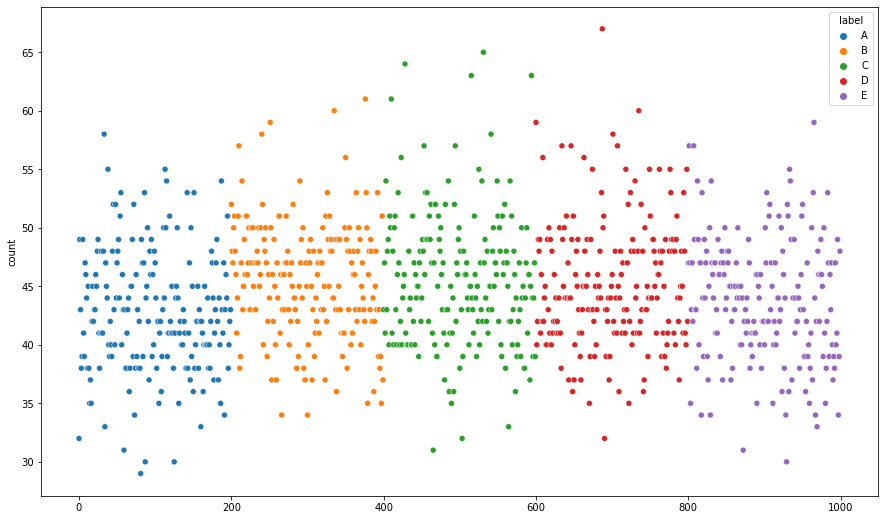

In [9]:
def countWords(text):
    return len(nltk.word_tokenize(text))

df['count'] = df['text'].apply(countWords)

plt.figure(figsize=(15,9))
sns.scatterplot(x =df.index, y = 'count', hue = 'label', data = df)


In [10]:
df = pd.read_csv('filteredRecords2.csv')
df.head()

,text,label
0,kate whitney startled kate idea came know came...,A
1,hollow hand sherlock holmes sat whistle jove p...,A
2,quite bulky remained might shown grip much fee...,A
3,late sherlock holmes returned came back alone ...,A
4,day hour likely crony landlady sherlock holmes...,A


# 3. Transforming Text Data

## 3.1 Bag of Words

In [14]:
vectorizer = CountVectorizer(max_features = 1500)
X_bow = vectorizer.fit_transform(df.text).toarray()
X_bow.shape

(1000, 1500)

In [15]:
BOW_df = pd.DataFrame(X_bow,columns = vectorizer.get_feature_names())
BOW_df.head()

,8vo,_mon,_was_,able,ablett,absence,absolute,absolutely,absurd,accepted,...,wrong,wrote,www,yard,year,years,yes,yesterday,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


[Text(0.5, 1.0, 'CountVectorzer')]

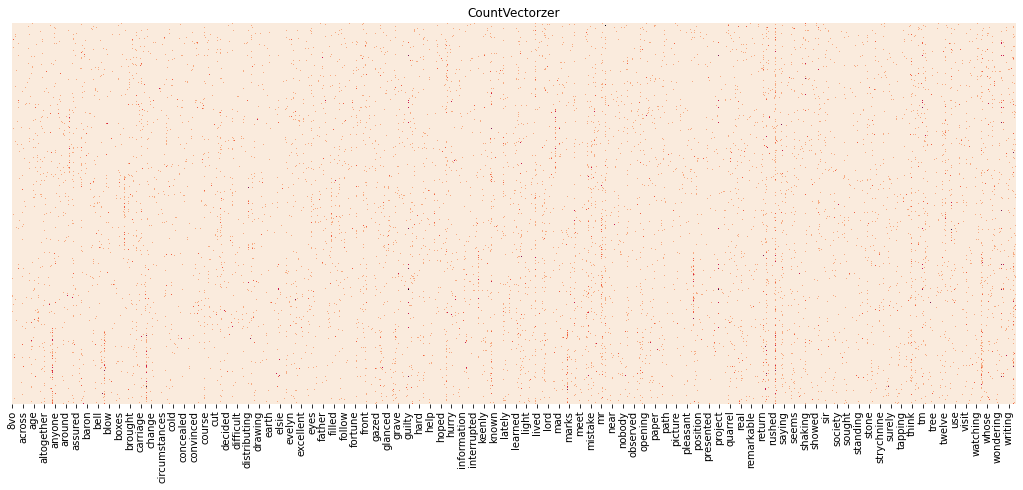

In [16]:
plt.figure(figsize=(18,7))
sns.heatmap(BOW_df, cbar =False,yticklabels = False, cmap = 'rocket_r').set(title='CountVectorzer')

## 3.2 TF-IDF

In [17]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_bow).toarray()
X_tfidf.shape

(1000, 1500)

In [18]:
TFIDF_df = pd.DataFrame(X_tfidf, columns = vectorizer.get_feature_names())
TFIDF_df.head()

,8vo,_mon,_was_,able,ablett,absence,absolute,absolutely,absurd,accepted,...,wrong,wrote,www,yard,year,years,yes,yesterday,yet,young
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.152283,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.204722,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.170209
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.227317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186764


[Text(0.5, 1.0, 'TF-IDF')]

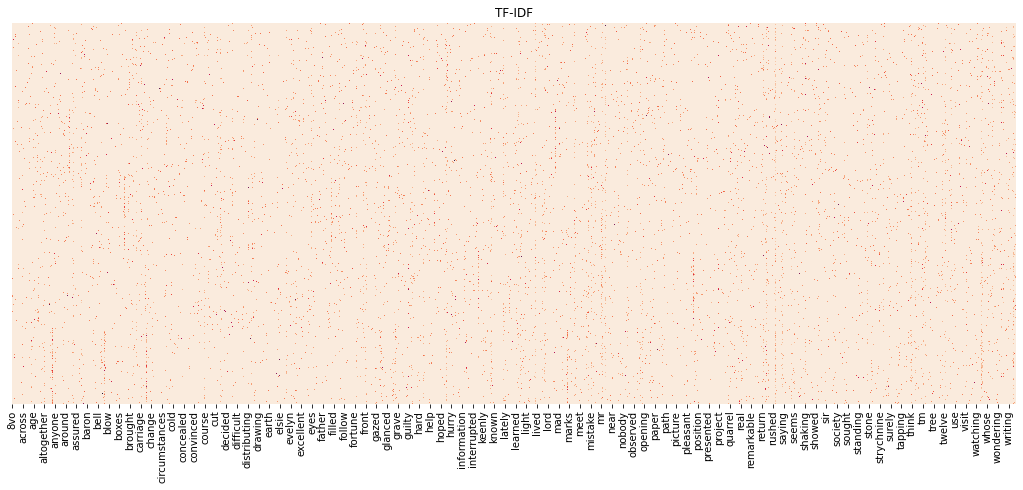

In [19]:
plt.figure(figsize=(18,7))
sns.heatmap(TFIDF_df, cbar =False,yticklabels = False, cmap = 'rocket_r').set(title='TF-IDF')

# 4. Model Building and Classification

In [20]:
# Defining Algorithms for using in all below code blocks
algorithms = {
            'SVM' : SVC(random_state = 21),
            'DTR' : DecisionTreeClassifier(random_state = 21),
            'RFC' : RandomForestClassifier(random_state = 21),
            'KNN' : KNeighborsClassifier(),
            'GNB' : GaussianNB()
        }

def modelRes(algorithms, X_train, y_train, X_test, y_test):
    testScores = {}
    testPreds = {}
    for modelName, model in algorithms.items():
        pipelineModel = Pipeline([('MODEL', model)])         
        pipelineModel.fit(X_train, y_train)
        testPreds[modelName] = pipelineModel.predict(X_test) 
        testScores[modelName] = cross_val_score(pipelineModel, X_test, y_test, cv=10, scoring="accuracy")
    avgTestScores = {}
    for name, model in testScores.items():
        avgTestScores[name] = np.mean(model)
    return avgTestScores, testPreds

## 4.1 Using Bag of Words vector Space

In [21]:
%%time
# Using the data we got from the BOW transformation (refer 3.1)
X_train, X_test, y_train, y_test = train_test_split(X_bow, df.label, test_size=0.2, random_state = 42)

# Store the cross validation scores and prediction
bowTestScores, bowTestPreds = modelRes(algorithms=algorithms,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)


# Converting it into a dataframe
avgBowTestScores_df = pd.DataFrame(bowTestScores, index=["Accuracy"]).T
avgBowTestScores_df 

Wall time: 2.55 s


,Accuracy
SVM,0.670
DTR,0.640
RFC,0.755
KNN,0.365
GNB,0.745


In [22]:
for key in bowTestPreds.keys():
    print(key, classification_report(y_test, bowTestPreds[key]))

SVM               precision    recall  f1-score   support

           A       0.64      0.91      0.75        33
           B       0.95      0.79      0.86        48
           C       0.86      0.81      0.83        37
           D       1.00      0.79      0.88        38
           E       0.83      0.91      0.87        44

    accuracy                           0.84       200
   macro avg       0.86      0.84      0.84       200
weighted avg       0.87      0.84      0.84       200

DTR               precision    recall  f1-score   support

           A       0.52      0.73      0.61        33
           B       0.79      0.62      0.70        48
           C       0.83      0.81      0.82        37
           D       0.86      0.79      0.82        38
           E       0.91      0.93      0.92        44

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.79      0.78      0.78       200

RFC           

## 4.2 Using IF-IDF vector Space

In [23]:
%%time
# Using the data we got from the IF-IDF transformation (refer 3.2)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df.label, test_size=0.2, random_state = 42)

# Store the cross validation scores and prediction
tfidfTestScores, tfidfTestPreds = modelRes(algorithms=algorithms,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

# Converting it into a dataframe
avgTfidfTestScores_df = pd.DataFrame(tfidfTestScores, index=["Accuracy"]).T
avgTfidfTestScores_df 

Wall time: 2.75 s


,Accuracy
SVM,0.595
DTR,0.635
RFC,0.795
KNN,0.730
GNB,0.680


In [24]:
for key in tfidfTestPreds.keys():
    print(key, classification_report(y_test, tfidfTestPreds[key]))

SVM               precision    recall  f1-score   support

           A       0.56      0.94      0.70        33
           B       0.92      0.71      0.80        48
           C       0.88      0.76      0.81        37
           D       0.97      0.82      0.89        38
           E       0.91      0.91      0.91        44

    accuracy                           0.82       200
   macro avg       0.85      0.83      0.82       200
weighted avg       0.86      0.82      0.83       200

DTR               precision    recall  f1-score   support

           A       0.49      0.79      0.60        33
           B       0.86      0.62      0.72        48
           C       0.82      0.73      0.77        37
           D       0.94      0.79      0.86        38
           E       0.87      0.93      0.90        44

    accuracy                           0.77       200
   macro avg       0.80      0.77      0.77       200
weighted avg       0.81      0.77      0.78       200

RFC           

## 4.3 When stop words and punctuations are not removed

In [36]:
print('############## Uncleaned Data\n'+df_unclean.text[0])
print('\n############## Cleaned Data\n'+df.text[0])

############## Uncleaned Data
it is Kate Whitney How you startled me Kate I had not an idea who you were when you came in I didn t know what to do so I came straight to you That was always the way Folk who were in grief came to my wife like birds to a lighthouse It was very sweet of you to come Now you must have some wine and water and sit here comfortably and tell us all about it Or should you rather that I sent James off to bed Oh no no I want the doctor s advice and

############## Cleaned Data
kate whitney startled kate idea came know came straight always way folk grief came wife like birds lighthouse sweet must wine water comfortably tell us rather sent james bed oh doctor advice


In [37]:
def modelRes20(algorithms, X_train, y_train, X_test, y_test):
    testScores = {}
    testPreds = {}
    for modelName, model in algorithms.items():
        pipelineModel = Pipeline([('MODEL', model)])         
        pipelineModel.fit(X_train, y_train)
        testPreds[modelName] = pipelineModel.predict(X_test) 
        testScores[modelName] = cross_val_score(pipelineModel, X_test, y_test, cv=10, scoring="accuracy")
    avgTestScores = {}
    for name, model in testScores.items():
        avgTestScores[name] = np.mean(model)
    return avgTestScores, testPreds

In [38]:
# Using the uncleaned data

vectorizer = CountVectorizer()
X_unclean = vectorizer.fit_transform(df.text).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_unclean, df_unclean.label, test_size=0.2, random_state = 42)

uncleanScores, uncleanPreds = modelRes20(algorithms=algorithms,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

# Converting it into a dataframe
uncleanScores_df = pd.DataFrame(uncleanScores, index=["Accuracy"]).T
uncleanScores_df 

,Accuracy
SVM,0.620
DTR,0.635
RFC,0.745
KNN,0.495
GNB,0.735


In [39]:
for key in uncleanPreds.keys():
    print(key, classification_report(y_test, uncleanPreds[key]))

SVM               precision    recall  f1-score   support

           A       0.63      0.94      0.76        33
           B       0.89      0.81      0.85        48
           C       0.88      0.81      0.85        37
           D       0.97      0.79      0.87        38
           E       0.95      0.91      0.93        44

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.87      0.85      0.85       200

DTR               precision    recall  f1-score   support

           A       0.56      0.73      0.63        33
           B       0.88      0.62      0.73        48
           C       0.75      0.81      0.78        37
           D       0.88      0.79      0.83        38
           E       0.88      0.98      0.92        44

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.80      0.79      0.79       200

RFC           

## 4.4 When no of words are reduced

In [29]:
np.random.seed(42)
files = glob.glob('books/*.txt')
df_reduced = pd.DataFrame(columns=['text','label'])
Label = 65
BookLabels = {}
for book in files:
    tdf = pd.DataFrame()
    tdf['text'] = Txt2List(book,200,50)
    tdf['label'] = chr(Label)
    df_reduced = df_reduced.append(tdf, ignore_index=True)
    
    BookLabels[re.split(r"books\\", book)[-1]] = chr(Label)
    Label += 1

In [31]:
%%time
print('##############Before removing stop Words\n'+df_reduced.text[0])

df_reduced.text = df_reduced['text'].apply(textfilter)

print('\n##############After removing stop words\n'+df_reduced.text[0])

##############Before removing stop Words
his pocket There are several other indications but these may be enough to aid us in our search Lestrade laughed I am afraid that I am still a sceptic he said Theories are all very well but we have to deal with a hard headed British jury _Nous verrons_ answered Holmes calmly You work your own method and I shall work mine I shall be busy this afternoon and shall probably return to London by the evening train And leave your case unfinished No finished But the mystery It is solved Who was the criminal then The gentleman I describe

##############After removing stop words
pocket several indications may enough aid us search lestrade laughed afraid still sceptic said theories well deal hard headed british jury _nous verrons_ answered holmes calmly work method shall work shall busy afternoon shall probably return london evening train leave case unfinished finished mystery solved criminal gentleman describe
Wall time: 7min 58s


In [33]:
df_reduced.to_csv("reduced.csv",index = False)

In [40]:
def modelReduced(algorithms, X_train, y_train, X_test, y_test):
    testScores = {}
    testPreds = {}
    for modelName, model in algorithms.items():
        pipelineModel = Pipeline([('MODEL', model)])         
        pipelineModel.fit(X_train, y_train)
        testPreds[modelName] = pipelineModel.predict(X_test) 
        testScores[modelName] = cross_val_score(pipelineModel, X_test, y_test, cv=10, scoring="accuracy")
    avgTestScores = {}
    for name, model in testScores.items():
        avgTestScores[name] = np.mean(model)
    return avgTestScores, testPreds

In [41]:
# Using the uncleaned data

vectorizer = CountVectorizer()
X_unclean = vectorizer.fit_transform(df_reduced.text).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_unclean, df_reduced.label, test_size=0.2, random_state = 42)

redScores, redPreds = modelReduced(algorithms=algorithms,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

# Converting it into a dataframe
redScores_df = pd.DataFrame(redScores, index=["Accuracy"]).T
redScores_df 

,Accuracy
SVM,0.545
DTR,0.665
RFC,0.735
KNN,0.425
GNB,0.660


## Experimenting with max_features parameter of CountVectorizer

In [42]:
def modelIteration(algorithms,X_train, y_train, X_test, y_test):
    testScores = {}
    for modelName, model in algorithms.items():
        pipelineModel = Pipeline([('MODEL', model)])         
        pipelineModel.fit(X_train, y_train)
        testScores[modelName] = cross_val_score(pipelineModel, X_test, y_test, cv=10, scoring="accuracy")
    avgTestScores = []
    for name, model in testScores.items():
        avgTestScores.append(np.mean(model))
    return avgTestScores

In [43]:
%%time
scoresList = []
indexList = []
for step in range(10,8000,1000):
    vectorizer = CountVectorizer(max_features = step)
    X_iter = vectorizer.fit_transform(df.text).toarray()
    X_train, X_test, y_train, y_test = train_test_split(X_iter, df.label, test_size=0.2, random_state = 42)
    scoresList.append(modelIteration(algorithms,X_train, y_train, X_test, y_test))
    indexList.append(step)
    
iter_res_df = pd.DataFrame(scoresList, index = indexList, columns = ['SVM','DTR','RFC','KNN','GNB'])

Wall time: 33.8 s


[Text(0.5, 1.0, 'Max Features vs Performance')]

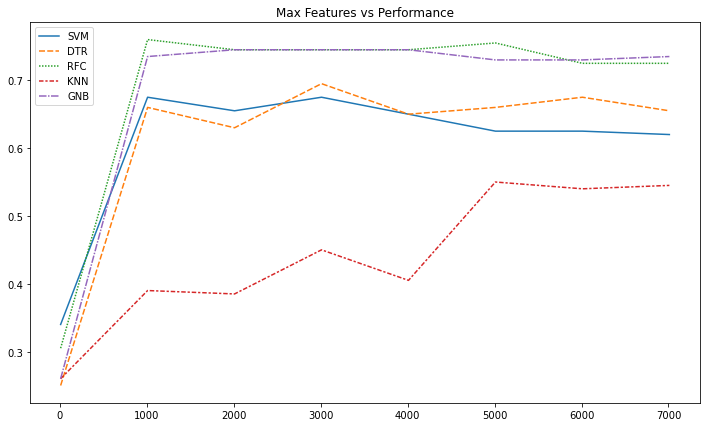

In [44]:
plt.figure(figsize=(12,7))
sns.lineplot(data = iter_res_df).set(title='Max Features vs Performance')

# 5. Evaluation, Results, The Champion model

## Accuracy Scores Comparision in different Scenarios

<AxesSubplot:title={'center':'Reduced Words Scenario'}>

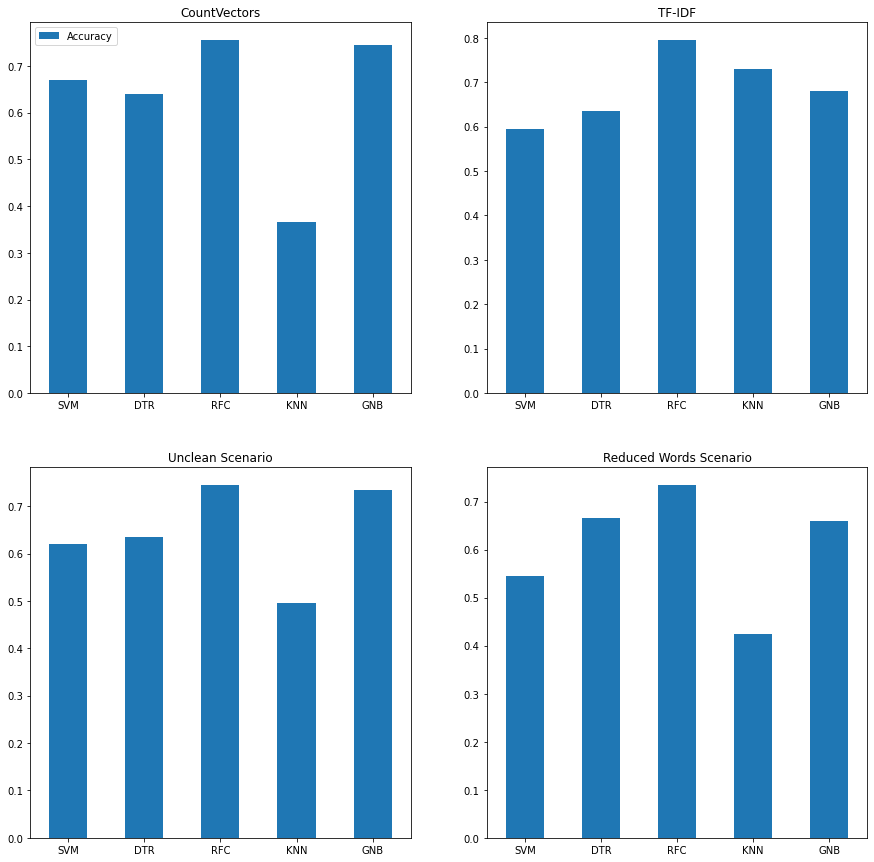

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
avgBowTestScores_df.plot(kind='bar', ax=axes[0,0], rot=0, title="CountVectors")
avgTfidfTestScores_df.plot(kind='bar', ax=axes[0,1], rot=0, legend=False, title="TF-IDF") 
uncleanScores_df.plot(kind='bar', ax=axes[1, 0], rot=0, legend=False, title="Unclean Scenario") 
redScores_df.plot(kind='bar', ax=axes[1, 1], rot=0, legend=False, title="Reduced Words Scenario") 

# Champion Model

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.2, random_state = 42)

In [48]:
pipeline_champion= Pipeline([('Bow',CountVectorizer()),
                             ('tf-idf',TfidfTransformer()),
                            ('RFC',RandomForestClassifier(n_jobs=-1,random_state = 21))])
pipeline_champion.fit(X_train,y_train)
value = cross_val_score(pipeline_champion,X_test,y_test, cv =10,scoring="accuracy")
print(np.mean(value))

0.7150000000000001


In [49]:
%%time
RandomForest_grid = {"RFC__n_estimators": np.arange(10, 100, 10),
           "RFC__max_depth": [None, 3, 5, 10],
           "RFC__min_samples_split": np.arange(2, 20, 2),
           "RFC__min_samples_leaf": np.arange(1, 20, 2),
           "RFC__max_features": [0.5, 1, "sqrt", "auto"]}
RFC = RandomizedSearchCV(pipeline_champion,
                              param_distributions=RandomForest_grid,
                              n_iter=10,
                              cv=10,
                              verbose=True)
RFC.fit(X_train, y_train)

<IPython.core.display.Javascript object>

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 13.1 s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('Bow', CountVectorizer()),
                                             ('tf-idf', TfidfTransformer()),
                                             ('RFC',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=21))]),
                   param_distributions={'RFC__max_depth': [None, 3, 5, 10],
                                        'RFC__max_features': [0.5, 1, 'sqrt',
                                                              'auto'],
                                        'RFC__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'RFC__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'RFC__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [50]:
RFC.best_params_

{'RFC__n_estimators': 60,
 'RFC__min_samples_split': 12,
 'RFC__min_samples_leaf': 1,
 'RFC__max_features': 1,
 'RFC__max_depth': None}

In [51]:
RFC.score(X_test, y_test)

0.775

# 6. Error Analysis

Refer the ErrorAnalysis.ipynb